In [4]:
import numpy as np
import openqcs.tools as t

In [64]:
def partial_trace_small(M, sysbit=0):
    # partial trace just works if the most significant qubit is the 
    if M.shape[0]!=M.shape[1]:
        raise ValueError()
    nbits = int(np.log2(M.shape[0]))
    print("nbits = ", nbits)
    
    
    envbits = [i for i in range(nbits) if i!=sysbit]
    
    print(sysbit)
    print(envbits)
    
    X = np.matrix(np.zeros((2,2)))
    
    for k in range(2**(nbits-1)):
        tmp = M[k*2:(k+1)*2, k*2:(k+1)*2]
        X += tmp
    
    return X




In [61]:
def split_number(k, sysbit, nbits):
    s = -sysbit-1
    binary = "{0:b}".format(k)
    while len(binary) < nbits:
        binary = "0"+binary
        
    env_binary_arr = [binary[i] for i in range(len(binary)) if i!=len(binary)+s]
    sys_value = int(binary[len(binary)+s])

    env_binary = ""
    for v in env_binary_arr:
        env_binary+=v
    
    env_value = int(env_binary,2)
    
    return sys_value, env_value
    
for i in range(2**2):
    print(split_number(i, 1, 2))

(0, 0)
(0, 1)
(1, 0)
(1, 1)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


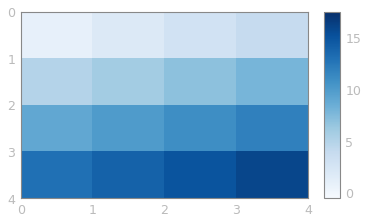

nbits =  2
0
[1]
[[12. 14.]
 [20. 22.]]
nbits =  2
0
[1]


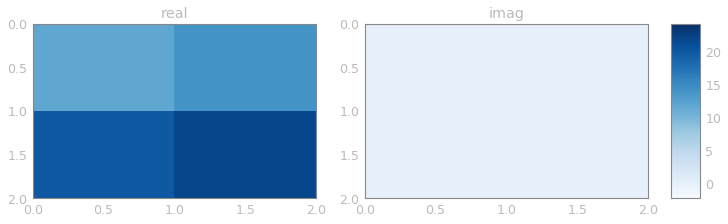

[[12.+0.j 14.+0.j]
 [20.+0.j 22.+0.j]]


In [87]:
def partial_trace(M, sysbit=0):
    if M.shape[0]!=M.shape[1]:
        raise ValueError()
    nbits = int(np.log2(M.shape[0]))
    print("nbits = ", nbits)
    
    
    envbits = [i for i in range(nbits) if i!=sysbit]
    
    print(sysbit)
    print(envbits)
    
    X = np.matrix(np.zeros((2,2)), dtype=np.complex)
    
    partial_matrices = [np.zeros((2,2), dtype=np.complex) for i in range(2**(nbits-1))]
    for k in range(2**nbits):
        for l in range(2**nbits):
            k_sys, k_env = split_number(k, sysbit, nbits)
            l_sys, l_env = split_number(l, sysbit, nbits)
            
            if k_env == l_env:
                partial_matrices[k_env][k_sys, l_sys] = M[k,l]
            
    for tmp in partial_matrices:
        X += np.matrix(tmp)
            
    
    return X


M = np.matrix(np.random.rand(4*4).reshape(4,4))
M = np.matrix(np.arange(1,17).reshape(4,4))
print(M)
t.color_matrix(M)
Msys = partial_trace_small(M, sysbit=0)
print(Msys)
Msys1 = partial_trace(M, sysbit=0)
t.color_matrix(Msys1)
print(Msys1)
